###Linear Regression

Linear regression is an algorithm that given dataset $D = \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}$ it learns to map inputs x to outputs y where y is a continuous quantity.

Linear regression models a response variable as a linear combination of input features vectors $phi(x)$.
-- e is the residual error between linear predictions and the true response
The quality of the linear regression is characterized with mean squared error (MSE)


####**Bayesian Linear regression**

We write the linear regression as
$y(x) = w^{T} + e$. If we assume that $e \sim N(0, \sigma^2)$ is a zero mean gaussian rv with a variance sigma^2, we write the linear regression as
$p(y | x, \theta) = N(y | w^{T}x, \sigma^{2})$

To fit a linear regression model to data, we minimize the negative log likelihood
$$NLL(\mathbf{w}, \sigma^2) = -\log(p(y|x, \theta)) = \frac{1}{2\sigma^2} \sum_{n=1}^{N} (y_n - \mathbf{w}^T \mathbf{x}_n)^2 + \frac{N}{2} \log(2\pi\sigma^2)$$

We write the estimation $ \hat{w} = (X^{T}X + \lambda I)^{-1} X^{T} y $. To make the Bayesian linear regression robust against overfitting, the parameters have to be small by placing a zero-mean Gaussian prior.
$p(w) = \prod_{d} {N}(w_d | 0, \tau^2)$. Thus we can rewrite the regularized objective
$ \min_{w} \text{NLL}(w, \sigma^2) + \lambda \cdot L_2(w^2)$. Solving for w we get coefficients
$\hat{w}_{ridge} = (X^{T}X + \lambda I)^{-1} X^{T}y$.

We learn the parameters w using gradient descent (ridge_reg algorithm)

$
\begin{array}{l}
\text{class ridge_reg} \\
\textbf{Function fit(X, y)} \\
\quad \text{for } i = 1, 2, \dots, n \\
\quad \quad y\_hat = w^T X \\
\quad \quad grad = -(y - y\_hat)^T X + \lambda w \\
\quad \quad w = w - n_i \text{ grad # update weight regression weights} \\
\quad \text{end for} \\
\quad \text{return } w \\
\textbf{Function predict(w, X)} \\
\quad y\_hat = w^T X \text{ # make a prediction} \\
\quad \text{return } y\_hat
\end{array}
$

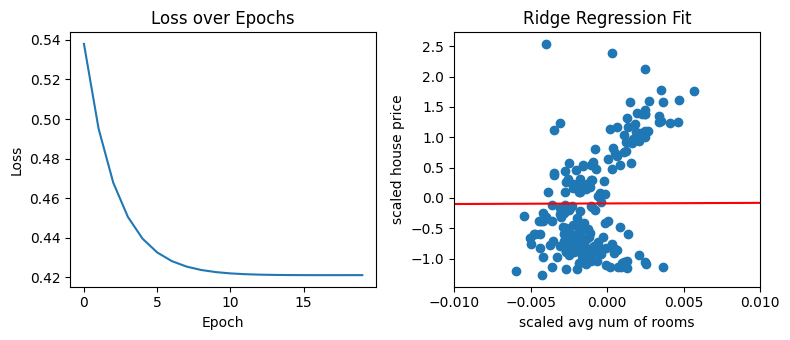

In [ ]:
''' Ridge regression '''

####**Hierarchical Bayesian regression**

Hierarchical models enable feature sharing among groups. The model is assumed to be sampled from a common distribution that models similarity between groups. In Bayesian hierarchical regression we can assign priors on model parameters and use MCMC sampling to infer posterior distributions.

Assuming a hierarchical model in which parameters alpha_c and beta_c are sampled from common distrobutions, we define probability distributions over regression coefficients and model the data likelihood as the normal distribution with uniform standard deviation. Run inference using the no-U-turn sampler (NUTS).

We define the probabilistic model, we use PyMC library for variational inference. We first set the hyperpriors for the mean and variance of the regression intercept and slope models. We define these as Gaussian rvs and define the error model as a uniform rv. Finally, we compute the regression expression and set it as a mean in the data likelihood model, then we proceed with NUTS inference.

$
\begin{array}{l}
\text{Function hierarch}(X, y) \\
\quad \text{with pymc3.Model() as hierarchical\_model:} \\
\quad \quad \mu_a \sim N(0, 100^2) \\
\quad \quad \sigma_a \sim \text{Unif}[0,100] \\
\quad \quad \mu_b \sim N(0, 100^2) \\
\quad \quad \sigma_b \sim \text{Unif}[0,100] \\
\quad \quad a \sim N(\mu_a, \sigma_a^2) \quad \text{\# intercept model} \\
\quad \quad b \sim N(\mu_b, \sigma_b^2) \quad \text{\# slope model} \\
\quad \quad e \sim \text{Unif}[0, 100] \quad \text{\# error model} \\
\quad \quad y_{exp} = a + b \cdot X \quad \text{\# expected value} \\
\quad \quad y_{lh} \sim N(X; y_{exp}, e^2) \quad \text{\# data likelihood} \\
\quad \text{with hierarchical\_model:} \\
\quad \quad \mu, sds, elbo = \text{pymc3.variational.advi}(n=100k) \\
\quad \quad step = \text{pymc3.NUTS}(scaling = sds^2, is\_cov=True) \\
\quad \quad trace = \text{pymc3.sample}(5000, step, start = \mu) \\
\quad \text{return trace}
\end{array}
$

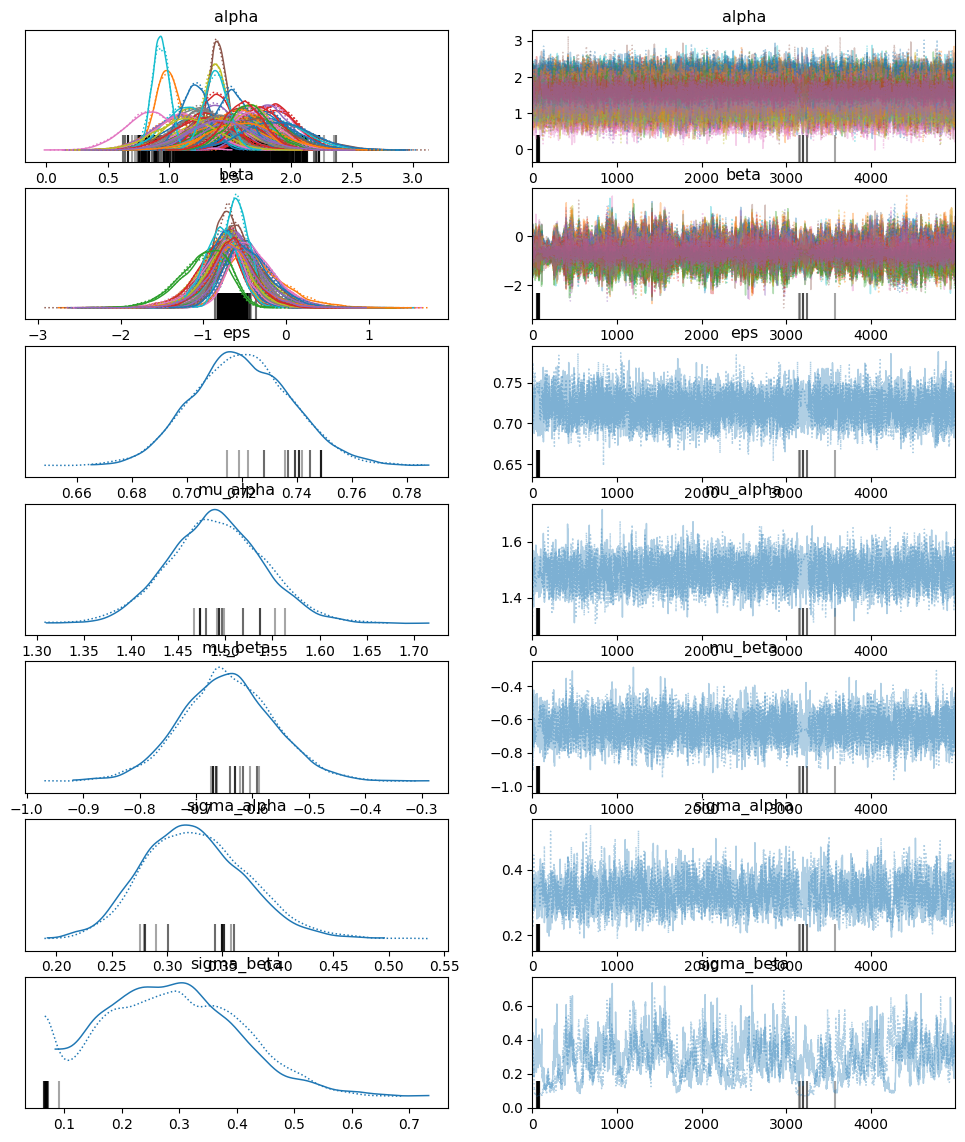

In [ ]:
''' MCMC traceplots for hierarchical Bayesian regression
Hyperpriors -- mu_a , sigma_a, mu_b, sigma_b
Intercept for each, distributed around group mean mu_a, and mu_b -- a, b
Model error -- eps
Expected value -- est = a[county_idx] + b[county_idx] * data.floor.values
Data likelihood -- y_like
'''

####**KNN regression**

K nearest neighbors (KNN) regression is an example of a nonparametric model in which a given query data point q, we find its nearest neighbors in the training set and compute the average response variable y.

We compute the average of KNN target labels for Iris dataset. The average is taken over the local neighborhood of K points that are closest to our query q.
$$y_q = \frac{1}{K} \sum_{i \in N_k(q, D)} y_i$$

Here, $N_k(q, D)$ denotes the local neighborhood of k nearest neighbors to query q from training dataset D.



$
\begin{array}{l}
\text{class KNN} \\
\text{Function knn\_search}(K, X, y, Q) \\
\quad \text{for query in } Q \\
\quad \quad idx = \text{argsort}(\text{euclidian\_dist}(\text{query}, X))[:K] \quad \text{# KNN IDs} \\
\quad \quad \text{knn\_labels} = [y[i] \text{ for } i \text{ in } idx] \quad \text{# KNN labels} \\
\quad \quad y_{pred} = \text{mean}(\text{knn\_labels}) \quad \text{# KNN regression} \\
\quad \text{end for} \\
\quad \text{return } y_{pred}
\end{array}
$

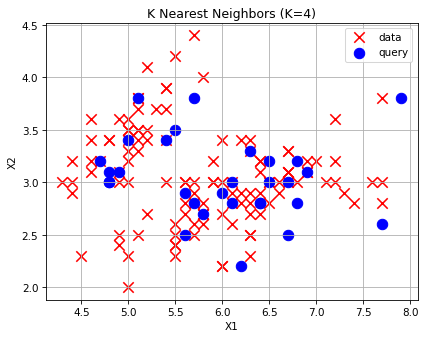

In [ ]:
''' K Nearest Neighbors (K=%d)'% K '''

####**Gaussian process regression**

Gaussian processes infer a distribution over functions given the data $p(f|x,y)$ and use it to make predictions given new data.


GP assumes that the function is defined at a finite and arbitrary chosen set of points $x_1, ...,x_n$, such that $p(f(x_1), \dots, f(x_n))$ is jointly Gaussian with mean $mu(x)$ and covariance $Σ(x)$, where $Σ_ij = K(x_i, x_j)$ and K is a positive definite kernel function.

Consider a simple regression problem
$
\begin{array}{l}
f(x) = x^T w,
y = f(x) + e,
e \sim N(0, \sigma_n^2)
\end{array}
$

Assuming independent and identically distributed noise, we write the likelihood function
$$p(y \mid X, w) = \prod_{i=1}^{n} p(y_i \mid x_i, w) \sim N(Xw, \sigma_n^2 I)$$


In the Bayesian framework, we need to specify a prior over the parameters, $w \sim N(0, \Sigma_p)$.

Writing the terms of the likelihood and the prior that depends on the weights, we get
$p(w \mid X, y) \sim N\left(\frac{1}{\sigma_n^2} A^{-1} X y, A^{-1}\right)$

Assume $A = \sigma_n^{-2} XX^T + \Sigma_p^{-1}$
we have a closed-form posterior distribution over the parameters w, and to make predictions we need to invert the matrix $A$ of size $pxp$
Assuming the observations are noiseless, we want to predict the function outputs $y_{*} = f(x_{*})$ where star is out data.
$K = k(X,X), K_{*} = k(X,X_{*})$, and $K_{*}{*} =k(X_{*}, X_{*})$ where $X$ is our training set, $X_{*}$ is out test dataset, and k is the kernel/covariance function.
$$[f, f_*] \sim N\left( [\mu, \mu_*], \begin{bmatrix} K & K_* \\ K_*^T & K_{**} \end{bmatrix} \right)$$


$
\begin{array}{l}
\text{GP regression} \\
\textbf{class } \text{GP\_reg} \\
\textbf{Function } \text{kernel\_fn}(x, z) \\
\quad K_{fn} = \exp\left\{-\frac{1}{2\sigma^2} \|x - z\|^2\right\} \quad \text{\# radial basis function} \\
\quad \textbf{return } K_{fn} \\
\textbf{Function } \text{compute\_posterior}(X) \\
\quad K = \text{kernel\_fn}(X_{train}, X_{train}) \\
\quad K_* = \text{kernel\_fn}(X_{train}, X_{test}) \\
\quad K_{**} = \text{kernel\_fn}(X_{test}, X_{test}) \\
\quad \mu_{post} = \mu(X_{test}) + K_*^T K^{-1}(f - \mu(X_{train})) \quad \text{\# Gaussian process posterior} \\
\quad \Sigma_{post} = K_{**} - K_*^T K^{-1} K_* \\
\quad \textbf{return } \mu_{post}, \Sigma_{post}
\end{array}
$

Below we show three functions at random from a GP prior and GP posterior after observing data points in case of noise free observations. The shaded area corresponds to two times the std around the mean (95% confidence region). The model perfectly interpolates the training data and the predictive uncertainty increases as we move further away from observations.

The algorithm is defined in terms of inner products in the input space, it can be lifted into feature space by reducing inner products with k(x,x')

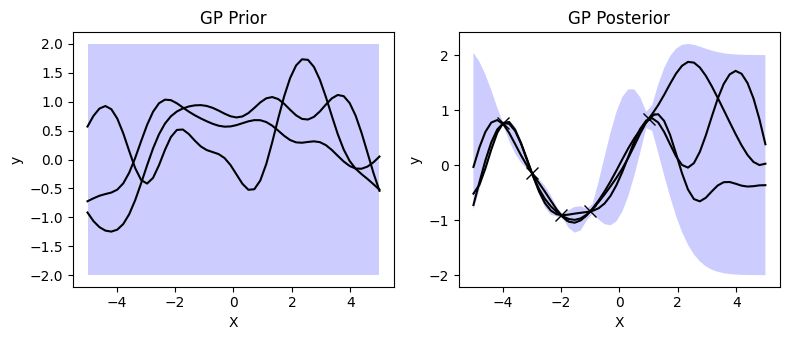

In [ ]:
''' Gaussian process regression - the prior and posterior '''

For Regression algorithms, based on the nature of data, we choose either a linear algorithm, such as Bayesian, or a non linear KNN regression. We may benefit with a hierarchical model in which certain features are shared among the groups. In case of predicting functional relationships between variables, the Gaussian process provides a way with more advanced supervised learning algorithms.
